In [6]:
import build.python.pyschedlib as sc
import scripts.schedsim as sm

import os
import shutil
import matplotlib.pyplot as plt
import polars as pl
import subprocess
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor
from io import StringIO
import numpy as np
import json as js

pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)

SCHEDVIEW = "./build/apps/schedview"
sim = sm.SchedSimRunner("./build/apps/schedsim")

In [27]:
PLATFORM = "platforms/exynos5422.json"
DIR = "alloc_tasksets"
UTILIZATION = 6.5
LITTLE_PERF_SCORE = 0.33334

#targets = [round(x*0.1, 1) for x in range(1, int(LITTLE_PERF_SCORE*10)+1)];
targets = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, LITTLE_PERF_SCORE]
alloc = "smart_ass"
sched = "grub"
print(targets)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.33334]


In [8]:
plat = {}
with open(PLATFORM, 'r') as f:
    plat = js.loads("".join(f.readlines()))

plat

{'clusters': [{'effective_freq': 1200.0,
   'frequencies': [200.0,
    400.0,
    600.0,
    800.0,
    1000.0,
    1200.0,
    1400.0,
    1600.0,
    1800.0,
    2000.0,
    2100.0],
   'power_model': [0.04433100178,
    3.410453667e-06,
    2.193142733e-08,
    4.609381282e-11],
   'procs': 4,
   'perf_score': 1.0},
  {'effective_freq': 600.0,
   'frequencies': [200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, 1300.0, 1400.0],
   'power_model': [0.04433100178,
    3.410453667e-06,
    2.193142733e-08,
    4.609381282e-11],
   'procs': 4,
   'perf_score': 0.3334}]}

# Generate the tasksets

In [9]:
if os.path.isdir(DIR):
    shutil.rmtree(DIR)

os.mkdir(DIR)

util_steps = list(reversed(range(1, int(UTILIZATION*10)+1, 2)))
NB_JOBS = 100
NB_TASK = 50
UMAX    = 0.8 #LITTLE_PERF_SCORE - 0.13334

for i in util_steps:
    data_path = f"{DIR}/{str(i)}"
    os.mkdir(data_path)
    utilization = round(i * 0.1, 1)
    print(f"jobs = {NB_JOBS}, tasks = {NB_TASK}, umax = {UMAX}, utilization = {utilization}")
    sc.generate_tasksets(data_path, NB_JOBS, NB_TASK, utilization, UMAX, success_rate = 1.0, compression_rate = 1.0, nb_cores = 16, a_special_need=(0.0, min(targets)))

print("== finished ==")

jobs = 100, tasks = 50, umax = 0.8, utilization = 6.5
jobs = 100, tasks = 50, umax = 0.8, utilization = 6.3
jobs = 100, tasks = 50, umax = 0.8, utilization = 6.1
jobs = 100, tasks = 50, umax = 0.8, utilization = 5.9
jobs = 100, tasks = 50, umax = 0.8, utilization = 5.7
jobs = 100, tasks = 50, umax = 0.8, utilization = 5.5
jobs = 100, tasks = 50, umax = 0.8, utilization = 5.3
jobs = 100, tasks = 50, umax = 0.8, utilization = 5.1
jobs = 100, tasks = 50, umax = 0.8, utilization = 4.9
jobs = 100, tasks = 50, umax = 0.8, utilization = 4.7
jobs = 100, tasks = 50, umax = 0.8, utilization = 4.5
jobs = 100, tasks = 50, umax = 0.8, utilization = 4.3
jobs = 100, tasks = 50, umax = 0.8, utilization = 4.1
jobs = 100, tasks = 50, umax = 0.8, utilization = 3.9
jobs = 100, tasks = 50, umax = 0.8, utilization = 3.7
jobs = 100, tasks = 50, umax = 0.8, utilization = 3.5
jobs = 100, tasks = 50, umax = 0.8, utilization = 3.3
jobs = 100, tasks = 50, umax = 0.8, utilization = 3.1
jobs = 100, tasks = 50, umax

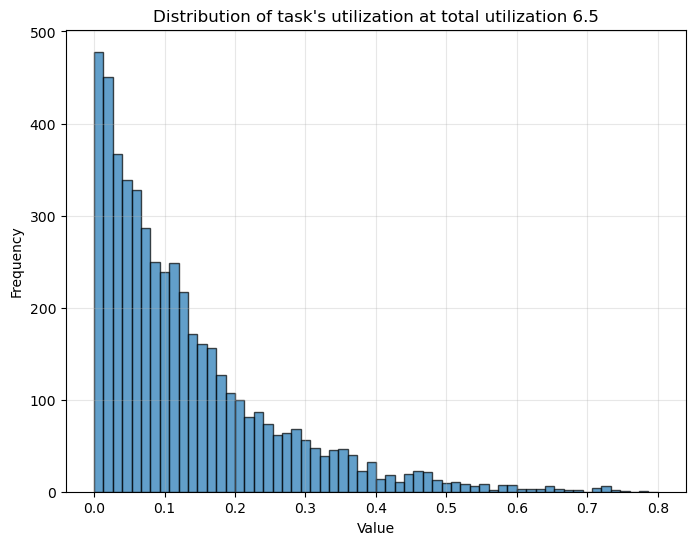

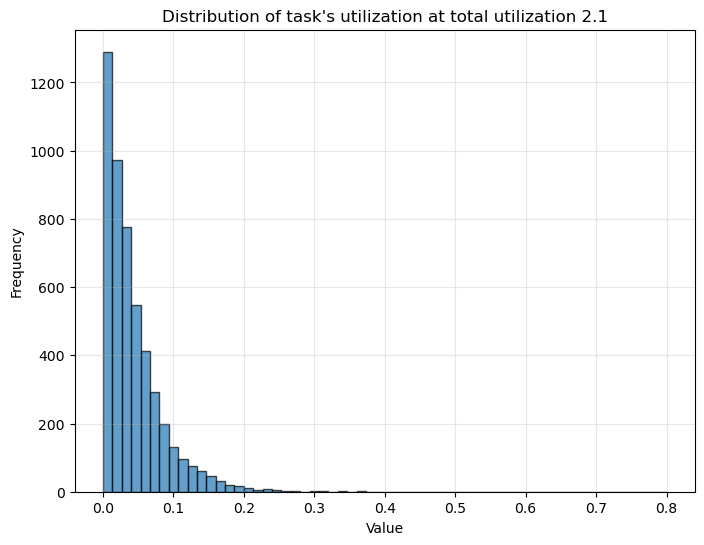

In [10]:
bins = np.linspace(0, UMAX, num=61)
values = []
for i in range(1, 101):
    lines = []
    with open(f"{DIR}/65/{str(i)}.json", "r") as f:
        lines = f.readlines()
    file_values = [t.utilization for t in sc.from_json_setting(lines[0]).tasks]
    values += file_values


plt.figure(figsize=(8, 6))
plt.hist(values, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of task\'s utilization at total utilization 6.5')
plt.grid(True, alpha=0.3)
plt.show()

values = []
for i in range(1, 101):
    lines = []
    with open(f"{DIR}/21/{str(i)}.json", "r") as f:
        lines = f.readlines()
    file_values = [t.utilization for t in sc.from_json_setting(lines[0]).tasks]
    values += file_values


plt.figure(figsize=(8, 6))
plt.hist(values, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of task\'s utilization at total utilization 2.1')
plt.grid(True, alpha=0.3)
plt.show()

# Simulate the tasksets

In [11]:
for target in targets:
    print(f"-> logs_{alloc}_{sched}_{target}")
    sim.simul(DIR, alloc, sched, PLATFORM, target, f"{DIR}_logs_{alloc}_{sched}_{target}")

print(f"-> logs_little_first_{sched}")
sim.simul(DIR, "little_first", sched, PLATFORM, 0.2, f"{DIR}_logs_little_first_{sched}")
print("== finished ==")

-> logs_smart_ass_grub_0.05
-> logs_smart_ass_grub_0.1
-> logs_smart_ass_grub_0.15
-> logs_smart_ass_grub_0.2
-> logs_smart_ass_grub_0.25
-> logs_smart_ass_grub_0.3
-> logs_smart_ass_grub_0.33334
-> logs_little_first_grub
== finished ==


-> logs_smart_ass_grub_0.5


-> logs_smart_ass_grub_0.6


# Logs analysis

In [22]:
def compute_stats(logs_dir):
    args = [SCHEDVIEW, "--platform", PLATFORM, "-d", logs_dir, "--index", "--arrivals", "--rejected", "--deadlines-counts", "--cmigration", "--transitions", "--duration"]
    try:
        df_res = pl.read_csv(StringIO(subprocess.run(args, capture_output=True, text=True, check=True).stdout), separator=';')
    except subprocess.CalledProcessError as e:
        print(f"CalledProcessError: {str.join(" ", e.cmd)} | {e.stdout}")
        raise e

    df_res = df_res.with_columns((pl.col("file").str.extract(r"(\w+).json").cast(pl.Int32)).alias("id")).drop("file")
    df_energy = pl.DataFrame({
        "c1-energy": [],
        "c2-energy": []
    }, schema={"c1-energy": pl.Float64, "c2-energy": pl.Float64})
    for i in range(1, 101):
        args = [SCHEDVIEW, "--platform", PLATFORM, f"{logs_dir}/{i}.json", "--index", "--energy"]
        df = pl.read_csv(StringIO(subprocess.run(args, capture_output=True, text=True, check=True).stdout), separator=';')
        df = pl.DataFrame({"c1-energy": df["energy_consumption"][0], "c2-energy": df["energy_consumption"][1]})
        df_energy = pl.concat([df_energy, df])

    df_util = pl.DataFrame({
        "c1-util": [],
        "c2-util": []
    }, schema={"c1-util": pl.Float64, "c2-util": pl.Float64})
    for i in range(1, 101):
        args = [SCHEDVIEW, "--platform", PLATFORM, f"{logs_dir}/{i}.json", "--index", "--util"]
        df = pl.read_csv(StringIO(subprocess.run(args, capture_output=True, text=True, check=True).stdout), separator=';')
        df = pl.DataFrame({"c1-util": df["util"][0], "c2-util": df["util"][1]})
        df_util = pl.concat([df_util, df])

    return pl.concat([df_res, df_energy, df_util], how="horizontal")

stats = {}
for target in targets:
    print(f"-> target {target}")
    stats[target] = {}
    stats_df = []

    def compute_utilization_step(i):
        return compute_stats(f"{DIR}_logs_{alloc}_{sched}_{target}/{i}").with_columns(utilizations=i/10)

    with ThreadPoolExecutor() as executor:
        stats_df = list(executor.map(compute_utilization_step, util_steps))

    stats[target] = pl.concat(stats_df).select(["utilizations", "id", pl.exclude(["utilizations", "id"])]).sort(["utilizations", "id"])

print(f"-> little_first")
stats["little_first"] = {}
stats_df = []

def compute_utilization_step(i):
    return compute_stats(f"{DIR}_logs_little_first_{sched}/{i}").with_columns(utilizations=i/10)

with ThreadPoolExecutor() as executor:
    stats_df = list(executor.map(compute_utilization_step, util_steps))

stats["little_first"] = pl.concat(stats_df).select(["utilizations", "id", pl.exclude(["utilizations", "id"])]).sort(["utilizations", "id"])

print("== finished ==")

-> target 0.05
-> target 0.1
-> target 0.15
-> target 0.2
-> target 0.25
-> target 0.3
-> target 0.33334
-> little_first
== finished ==


In [30]:
results = {}
for target in targets + ["little_first"]:
    results[target] = (stats[target].with_columns(
        (1 - (pl.col("rejected") / pl.col("arrivals"))).alias("accepted-rates"),
        (1 - (pl.col("deadlines-counts") / (pl.col("arrivals") - pl.col("rejected")))).alias("meet-rates"),
        (pl.col("cmigration") / pl.col("transitions")).alias("migration-rates"),
        (pl.col("c1-energy") / pl.col("duration")).alias("c1-power"),
        (pl.col("c2-energy") / pl.col("duration")).alias("c2-power"),
        (pl.col("c1-energy") / pl.col("duration") + pl.col("c2-energy") / pl.col("duration")).alias("total-power"),
        (pl.col("c1-util") + pl.col("c2-util")).alias("total-util")
    ).group_by("utilizations").agg(
        pl.col("accepted-rates").mean(),
        pl.col("meet-rates").mean(),
        pl.col("migration-rates").mean(),
        pl.col("c1-power").mean(),
        pl.col("c2-power").mean(),
        pl.col("total-power").mean(),
        pl.col("c1-util").mean(),
        pl.col("c2-util").mean(),
        pl.col("total-util").mean()
    ))

energy = pl.concat([
  stats[t].select(["utilizations", "id", "c1-energy", "c2-energy"]).rename({"c1-energy": f"c1-energy-{str(t)}", "c2-energy": f"c2-energy-{str(t)}"}) for t in targets+["little_first"]
], how="align")

energy_diff = energy.with_columns(
    [(pl.col(f"{clu}-energy-{t}") - pl.col(f"{clu}-energy-little_first")).alias(f"{clu}-energy-{t}-diff") for t in targets+["little_first"] for clu in ["c1", "c2"]],
).with_columns(
    [(pl.col(f"c1-energy-{target}-diff") + pl.col(f"c2-energy-{target}-diff")).alias(f"energy-{target}-diff") for target in targets+["little_first"]]
).group_by("utilizations").agg(
    pl.exclude(["utilizations", "id"]).mean()
)

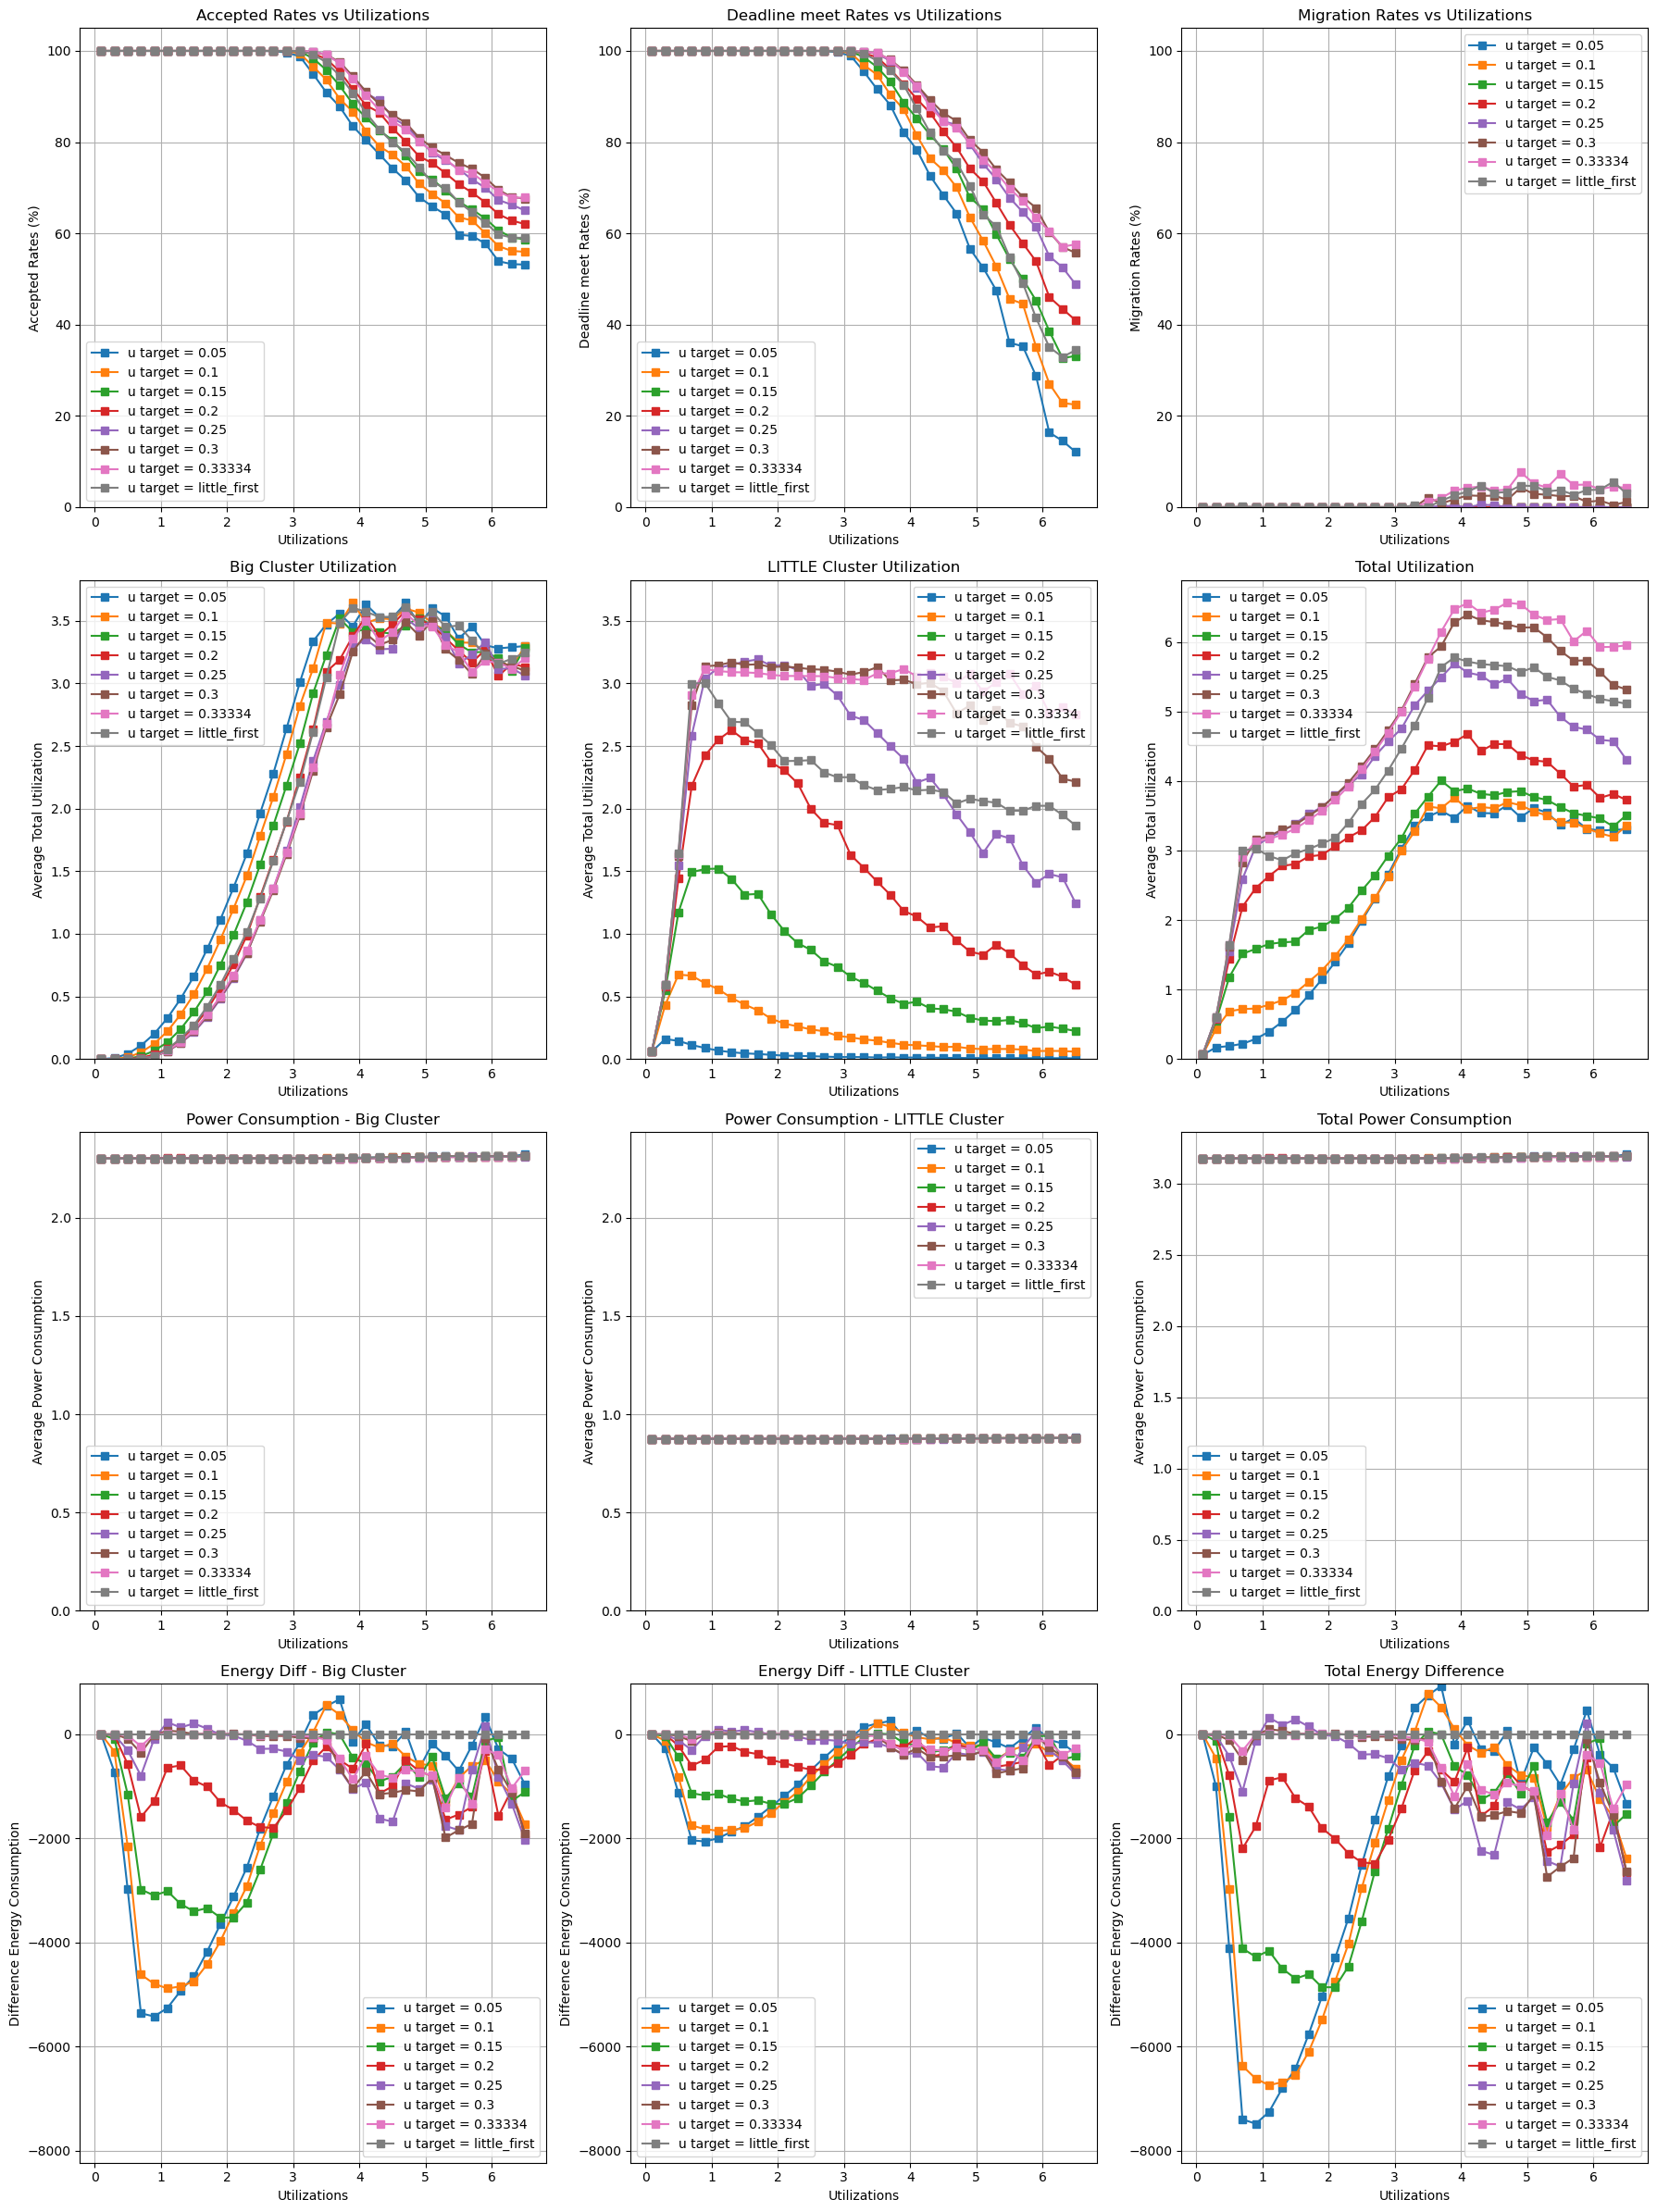

In [32]:
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
axes = axes.flatten()

axe=0
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["accepted-rates"] * 100, label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, 105)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Accepted Rates (%)")
axes[axe].set_title("Accepted Rates vs Utilizations")
axes[axe].legend()
axes[axe].grid(True)

axe=1
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["meet-rates"] * 100, label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, 105)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Deadline meet Rates (%)")
axes[axe].set_title("Deadline meet Rates vs Utilizations")
axes[axe].legend()
axes[axe].grid(True)

axe=2
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["migration-rates"] * 100, label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, 105)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Migration Rates (%)")
axes[axe].set_title("Migration Rates vs Utilizations")
axes[axe].legend()
axes[axe].grid(True)

axe=3
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["c1-util"], label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, max([results[x]["c1-util"].max() for x in targets]) * 1.05)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Average Total Utilization")
axes[axe].set_title("Big Cluster Utilization")
axes[axe].legend()
axes[axe].grid(True)

axe=4
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["c2-util"], label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, max([results[x]["c1-util"].max() for x in targets]) * 1.05)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Average Total Utilization")
axes[axe].set_title("LITTLE Cluster Utilization")
axes[axe].legend()
axes[axe].grid(True)

axe=5
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["total-util"], label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, max([results[x]["total-util"].max() for x in targets]) * 1.05)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Average Total Utilization")
axes[axe].set_title("Total Utilization")
axes[axe].legend()
axes[axe].grid(True)

axe=6
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["c1-power"], label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, max([results[x]["c1-power"].max() for x in targets]) * 1.05)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Average Power Consumption")
axes[axe].set_title("Power Consumption - Big Cluster")
axes[axe].legend()
axes[axe].grid(True)

axe=7
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["c2-power"], label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, max([results[x]["c1-power"].max() for x in targets]) * 1.05)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Average Power Consumption")
axes[axe].set_title("Power Consumption - LITTLE Cluster")
axes[axe].legend()
axes[axe].grid(True)

axe=8
for t in targets+["little_first"]:
    axes[axe].plot(results[t]["utilizations"], results[t]["total-power"], label=f"u target = {t}", marker='s')
axes[axe].set_ylim(0, max([results[x]["total-power"].max() for x in targets]) * 1.05)
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Average Power Consumption")
axes[axe].set_title("Total Power Consumption")
axes[axe].legend()
axes[axe].grid(True)

max_y = max(energy_diff.select(pl.col(r"^energy.*diff$")).max().with_columns(pl.max_horizontal("*").alias("max"))["max"]) * 1.05
min_y = max(energy_diff.select(pl.col(r"^energy.*diff$")).min().with_columns(pl.min_horizontal("*").alias("min"))["min"]) * 1.10

axe=9
for t in targets+["little_first"]:
    axes[axe].plot(energy_diff["utilizations"], energy_diff[f"c1-energy-{t}-diff"], label=f"u target = {t}", marker='s')
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Difference Energy Consumption")
axes[axe].set_title("Energy Diff - Big Cluster")
axes[axe].set_ylim(min_y, max_y)
axes[axe].legend()
axes[axe].grid(True)

axe=10
for t in targets+["little_first"]:
    axes[axe].plot(energy_diff["utilizations"], energy_diff[f"c2-energy-{t}-diff"], label=f"u target = {t}", marker='s')
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Difference Energy Consumption")
axes[axe].set_title("Energy Diff - LITTLE Cluster")
axes[axe].set_ylim(min_y, max_y)
axes[axe].legend()
axes[axe].grid(True)

axe=11
for t in targets+["little_first"]:
    axes[axe].plot(energy_diff["utilizations"], energy_diff[f"energy-{t}-diff"], label=f"u target = {t}", marker='s')
axes[axe].set_xlabel("Utilizations")
axes[axe].set_ylabel("Difference Energy Consumption")
axes[axe].set_title("Total Energy Difference")
axes[axe].set_ylim(min_y, max_y)
axes[axe].legend()
axes[axe].grid(True)

plt.tight_layout()
plt.show()